midpoint between 

In [43]:
import keras
import random
import tensorflow as tf
import numpy as np
import sklearn
import pandas as pd 
# Import dataset(s) from trusted source. In this analysis prices given by Yahoo! Finanace will be used for its integrity.

print('IMPORTING BITCOIN HISTORICAL DATA FROM 7/16/2010-9/1/2018')
btc_train_set= pd.read_csv('BTC-USD_train.csv')

print('BITCOIN data has {} input dates with {} features \n '.format(btc_train_set.shape[0],btc_train_set.shape[1]))
# btc.drop(['Date','Open','High','Low','Close','Adj Close'], axis = 1)
btc_train = btc_train_set.iloc[:,1:2].values

# Feature Scaling/Creating data structure with 60 timesteps and 1 output
from sklearn.preprocessing import MinMaxScaler
print('RESCALING THE DATA')
sc = MinMaxScaler()
btc = sc.fit_transform(btc_train)
# Create the inputs and the ouputs
X_train_btc = []
y_train_btc = []
for i in range(60,2938):
    X_train_btc.append(btc[i-60:i,0])
    y_train_btc.append(btc[i,0])
X_train_btc,y_train_btc = np.array(X_train_btc),np.array(y_train_btc)   
# Getting the inputs and the ouputs
# X_train_btc = btc[0:1825]
# y_train_btc = btc[1:1826]


# Reshaping the data given the new dimensionality to reshape numpy array
X_train_btc = np.reshape(X_train_btc, (X_train_btc.shape[0],X_train_btc.shape[1],1))
print('RESHAPED ORIGINAL DATA FROM {} TRAIN DATA INTO THE  {} SHAPE FOR TEST DATA'.format(btc_train.shape,X_train_btc.shape))

IMPORTING BITCOIN HISTORICAL DATA FROM 7/16/2010-9/1/2018
BITCOIN data has 2938 input dates with 7 features 
 
RESCALING THE DATA
RESHAPED ORIGINAL DATA FROM (2938, 1) TRAIN DATA INTO THE  (2878, 60, 1) SHAPE FOR TEST DATA


In [26]:
print('IMPORTING BITCOIN CASH HISTORICAL DATA FROM 7/31/2017-9/1/2018')
bch = pd.read_csv('BCH-USD_train.csv')
bch_test = pd.read_csv('BCH-USD_train.csv')
print('BITCOIN CASH data has {} input dates with {} features \n '.format(bch.shape[0],bch.shape[1]))
# bch.drop(['Date','Open','High','Low','Close','Adj Close'], axis = 1)
# bch = bch.iloc[:,1:2].values

# from sklearn.preprocessing import MinMaxScaler
# print('RESCALING THE DATA')
# sc = MinMaxScaler()
# bch = sc.fit_transform(bch)

# X_train_bch = bch[0:380]
# y_train_bch = bch[1:381]

# X_train_bch = np.reshape(X_train_bch, (380, 1, 1))

# print('finished')





IMPORTING BITCOIN CASH HISTORICAL DATA FROM 7/31/2017-9/1/2018
BITCOIN CASH data has 381 input dates with 7 features 
 
RESCALING THE DATA
finished


In [27]:

print('IMPORTING ETHEREUM HISTORICAL DATA FROM 8/6/2015-9/1/2018')
eth = pd.read_csv('ETH-USD_train.csv')
print('ETHEREUM data has {} input dates with {} features \n '.format(eth.shape[0],eth.shape[1]))
# eth.drop(['Date','Open','High','Low','Close','Adj Close'], axis = 1)
# eth = eth.iloc[:,1:2].values

# from sklearn.preprocessing import MinMaxScaler
# print('RESCALING THE DATA')
# sc = MinMaxScaler()
# eth = sc.fit_transform(eth)

# X_train_eth = eth[0:1105]
# y_train_eth = eth[1:1106]

# X_train_eth = np.reshape(X_train_eth, (1105, 1, 1))

# print('finished')


IMPORTING ETHEREUM HISTORICAL DATA FROM 8/6/2015-9/1/2018
ETHEREUM data has 1106 input dates with 7 features 
 
RESCALING THE DATA
finished


In [28]:
print('IMPORTING LITECOIN HISTORICAL DATA FROM 10/23/2013-9/1/2018')
ltc = pd.read_csv('LTC-USD_train.csv')
print('LITECOIN data has {} input dates with {} features  \n '.format(ltc.shape[0],ltc.shape[1]))
# # ltc.drop(['Date','Open','High','Low','Close','Adj Close'], axis = 1)
# ltc = ltc.iloc[:,1:2].values

# from sklearn.preprocessing import MinMaxScaler
# print('RESCALING THE DATA')
# sc = MinMaxScaler()
# ltc = sc.fit_transform(ltc)

# X_train_ltc = ltc[0:1157]
# y_train_ltc = ltc[1:1158]

# X_train_ltc = np.reshape(X_train_ltc, (1157, 1, 1))
# print('finished')

IMPORTING LITECOIN HISTORICAL DATA FROM 10/23/2013-9/1/2018
LITECOIN data has 1758 input dates with 7 features  
 
RESCALING THE DATA
finished


In [29]:
print('IMPORTING RIPPLE HISTORICAL DATA FROM 1/20/2015-9/1/2018')
xrp = pd.read_csv('XRP-USD_train.csv')
print('RIPPLE data has {} input dates with {} features  \n '.format(xrp.shape[0],xrp.shape[1]))
# xrp.drop(['Date','Open','High','Low','Close','Adj Close'], axis = 1)
# xrp = xrp.iloc[:,1:2].values

# from sklearn.preprocessing import MinMaxScaler
# print('RESCALING THE DATA')
# sc = MinMaxScaler()
# xrp = sc.fit_transform(xrp)

# X_train_xrp = xrp[0:1303]
# y_train_xrp= xrp[1:1304]

# X_train_xrp = np.reshape(X_train_xrp, (1303, 1, 1))
# print('finished')


IMPORTING RIPPLE HISTORICAL DATA FROM 1/20/2015-9/1/2018
RIPPLE data has 1304 input dates with 7 features  
 
RESCALING THE DATA
finished


In [44]:

# Part 2 - Building the RNN
# Importing the Keras libraries and packages necessary for making the stacked Lstm with dropout regularization 
# to help prevent overfitting
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

# Initialising the RNN
#Regression is used for its continuous outputs instead of categorical 
regressor = Sequential()

# Adding the input layer and the LSTM layers
# units = number of LSTM cells
#Keep units high to gather more dimensions in that data, return_sequences=True for stacked RNN
#input shape = timesteps, indicators 
#No sigmoid/relu/etc... activation function
regressor.add(LSTM(units = 72, input_shape = (X_train_btc.shape[1],1),return_sequences=True))
regressor.add(Dropout(.2))

regressor.add(LSTM(units= 72,return_sequences=True))
regressor.add(Dropout(.2))

regressor.add(LSTM(units=72,return_sequences=True))
regressor.add(Dropout(.2))

# remove return_sequences..No more sequences being returned
regressor.add(LSTM(units=72))
regressor.add(Dropout(.2))

# regressor.add(Dense(1,activation = 'softmax')) Not classification, i.e. no softmax
# Adding the output layer (t+1)
regressor.add(Dense(units = 1))

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 60, 72)            21312     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 72)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 60, 72)            41760     
_________________________________________________________________
dropout_31 (Dropout)         (None, 60, 72)            0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 60, 72)            41760     
_________________________________________________________________
dropout_32 (Dropout)         (None, 60, 72)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 72)                41760     
__________

In [45]:
print('Compiling the RNN')
#Adam performs relevant updates for the weights making it easy for the models optimization
#loss is mean squared error for its continuity (ERROR IS MEAN BETWEEN OF SQUARED DIFFERENCES BETWEEN TARGETS AND ACTUAL VALUES)
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

print('Fitting the RNN to the Training set')
print('Training The Data')

regressor.fit(X_train_btc, y_train_btc, batch_size = 48, epochs = 110)


Compiling the RNN
Fitting the RNN to the Training set
Training The Data
Epoch 1/110
2878/2878 [==============================] - 11s 4ms/step - loss: 0.0037
Epoch 2/110
2878/2878 [==============================] - 7s 2ms/step - loss: 0.0018
Epoch 3/110
2878/2878 [==============================] - 7s 2ms/step - loss: 0.0013
Epoch 4/110
2878/2878 [==============================] - 7s 2ms/step - loss: 0.0012
Epoch 5/110
2878/2878 [==============================] - 7s 2ms/step - loss: 0.0011
Epoch 6/110
2878/2878 [==============================] - 7s 2ms/step - loss: 8.4906e-04
Epoch 7/110
2878/2878 [==============================] - 7s 2ms/step - loss: 0.0011
Epoch 8/110
2878/2878 [==============================] - 7s 2ms/step - loss: 8.4055e-04
Epoch 9/110
2878/2878 [==============================] - 7s 3ms/step - loss: 8.8590e-04
Epoch 10/110
2878/2878 [==============================] - 7s 2ms/step - loss: 7.7966e-04
Epoch 11/110
2878/2878 [==============================] - 7s 2ms/step 

2878/2878 [==============================] - 7s 2ms/step - loss: 3.4738e-04
Epoch 93/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.8404e-04
Epoch 94/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.8801e-04
Epoch 95/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.4358e-04
Epoch 96/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.3779e-04
Epoch 97/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.3884e-04
Epoch 98/110
2878/2878 [==============================] - 7s 2ms/step - loss: 2.9577e-04
Epoch 99/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.7515e-04
Epoch 100/110
2878/2878 [==============================] - 7s 2ms/step - loss: 4.0712e-04
Epoch 101/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.2451e-04
Epoch 102/110
2878/2878 [==============================] - 7s 2ms/step - loss: 3.5138e-04
Epoch 103/110
2878/2878 [======

## LOSS IS MODERATELY LOW SO THE TRAINING DATA SO THIS GIVES A POSSIBLITY OF THE TESTING DATA GATHERING ACCURATE RESULTS AND NOT SHOW OVERFITTING OR UNDERFITTING

In [46]:
#GENERATING/VISUALIZING PREDICTIONS
#GETTING THE REAL STOCK PRICE OF BITCOIN Aug8,2018-9/82018
import matplotlib.pyplot as plt
btc_test_set = pd.read_csv('BTC-USD_test.csv')

real_stock_price = btc_test_set.iloc[:,1:2].values
dataset_total = pd.concat((btc_train_set['Open'],btc_test_set['Open']),axis=0)

# Getting the predicted stock price of Aug8,2018-9/82018
inputs = dataset_total[len(dataset_total)- len(btc_test_set) -60:].values
inputs = np.reshape(inputs, (-1,1))
inputs = sc.transform(inputs)

In [47]:
X_test_btc = []
for i in range(60,80):
    X_test_btc.append(inputs[i-60:i, 0])
X_test_btc = np.array(X_test_btc)
X_test_btc = np.reshape(X_test_btc,(X_test_btc.shape[0],X_train_btc.shape[1],1))
predicted_stock_price = regressor.predict(X_test_btc)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

	 real stock price 2017 
 [[7736.25    ]
 [7610.899902]
 [7542.339844]
 [7417.600098]
 [7017.890137]
 [7042.569824]
 [6945.77002 ]
 [6723.290039]
 [6285.060059]
 [6543.25    ]
 [6152.950195]
 [6091.140137]
 [6322.410156]
 [6263.200195]
 [6199.629883]
 [6274.220215]
 [6323.810059]
 [6591.180176]
 [6405.740234]
 [6502.240234]
 [6270.089844]
 [6491.089844]
 [6366.140137]
 [6539.129883]
 [6708.939941]
 [6749.709961]
 [6720.600098]
 [6915.919922]
 [7091.379883]
 [7051.609863]
 [6998.759766]
 [7026.959961]
 [7203.459961]
 [7301.25    ]
 [7270.049805]
 [7369.890137]
 [6705.029785]]

 predicted stock price 2017 [[8280.711 ]
 [8114.773 ]
 [7985.8267]
 [7890.7676]
 [7782.202 ]
 [7513.198 ]
 [7360.6035]
 [7260.0215]
 [7102.08  ]
 [6784.9043]
 [6719.2   ]
 [6546.8315]
 [6397.2344]
 [6446.659 ]
 [6489.9604]
 [6475.068 ]
 [6494.9634]
 [6542.155 ]
 [6713.9414]
 [6731.617 ]]


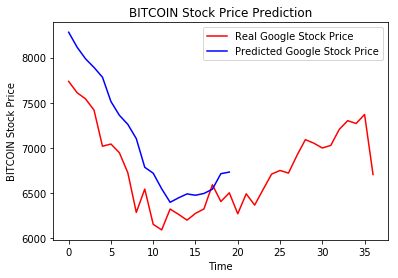

In [48]:
print('\t real stock price 2017 \n', real_stock_price)
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
print('\n predicted stock price 2017',predicted_stock_price)
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('BITCOIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BITCOIN Stock Price')
plt.legend()
plt.show()

SINCE THE DATA IS HIGHLY NON-LINEAR AND FAST CHANGING, IT IS OKAY IF THE PREDICTIONS ARE SOMEWHAT LACKING BEHIND THE REAL PREDICTIONS. IF CHANGES ARE SMOOTH, THIS MEANS THAT THE MODEL CAPTURED THE UPWARD AND DOWNWARD AND STABLE TRENDS IN THE DATA

In [55]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price[:20], predicted_stock_price))
rmse

437.84264426688696

In [7]:
import tensorflow as tf
n_inputs = 5
inputs = {'btc':0,
         'bch':1,
         'eth':21,
         'ltc':3,
         'xrp':4}
n_hidden = 2
n_outputs = 1
n_steps = 12
output = {'Buy':[btc,bch,eth,ltc,xrp],
          'Sell':[btc,bch,eth,ltc,xrp],
          'Hold':[btc,bch,eth,ltc,xrp]}

X0 = tf.placeholder(tf.float32,[None, n_steps,n_inputs], name='X0')
X1 = tf.placeholder(tf.float32,[None, n_steps,n_inputs], name='X1')
X2 = tf.placeholder(tf.float32,[None, n_steps,n_inputs], name='X2')
X3 = tf.placeholder(tf.float32,[None, n_steps,n_inputs], name='X3')
X4 = tf.placeholder(tf.float32,[None, n_steps,n_inputs], name='X4')

Wx = tf.Variable(tf.random_normal(shape=[n_inputs,n_hidden],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_hidden,n_hidden],dtype=tf.float32))

b = tf.Variable(tf.zeros([1,n_hidden],dtype=tf.float32))

X_seqs = tf.unstack(tf.transpose(X0,perm=[1,0,2])) 
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_hidden)
outputs,states = tf.nn.dynamic_rnn(basic_cell,X0,dtype=tf.float32)
print(outputs)

Tensor("rnn/transpose_1:0", shape=(?, 12, 2), dtype=float32)


In [27]:
y = 1. - tf.to_float(action)
print(y.shape)
learning_rate = .01
threshold = 1.
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=logits)
print(xentropy)
optim = tf.train.AdamOptimizer(learning_rate)
# optim = tf.train.MomentumOptimizer(learning_rate,momentum=.93)

(?, 1)
Tensor("logistic_loss:0", shape=(?, 1), dtype=float32)


In [28]:
grads_and_vars = optim.compute_gradients(xentropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []

for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32,shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))

AttributeError: 'NoneType' object has no attribute 'get_shape'

In [ ]:
training_op = optim.apply_gradients(grads_and_vars_feed)
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
import numpy as np
def discount_rewards(rewards,discount_rate):
    discounted_rewards = np.empty(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] +cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def discount_and_normalize_rewards(all_rewards,discount_rate):
    all_discounted_rewards = [discount_rewards(rewards,discount_rate)
                             for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/ reward_std
           for discounted_rewards in all_discounted_rewards]
        


In [ ]:
discount_rewards([10,0,-50],discount_rate=.8)

In [ ]:
discount_and_normalize_rewards([[10,0,-50],[10,20]],discount_rate=.8)

In [ ]:
n_iter = 250
n_max_steps = 1000
n_games_per_update = 10 
save_iterations = 10 
discount_rate = .95
nan = np.nan
T = np.array([p_charge_and_p_wait_and_p_search,action,n_outputs])
print(T)
R = np.array([p_charge_and_p_wait_and_p_search,action,n_outputs])
print(R)

possible_actions = [[inputs],[action],[outputs]]
print(possible_actions)

Q= np.full((3,3), - np.inf)
for state,actions in enumerate(possible_actions):
    Q[inputs, outputs] = 0.0
discount_rate = .95
n_iter = 100
for iteration in range(n_iter):
    Q_prev = Q.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q[s,a] = np.sum([T[s, a, outputs] * (R[s, a, outputs] +discount_rate * np.max(Q_prev[outputs]))
                             for outputs in range(3)])
                             

In [82]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 72, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units= 64, activation = 'relu'))
regressor.add(Dense(units=32, activation= 'softmax'))
regressor.add(Dense(units=12, activation= 'relu'))
regressor.add(Dropout(.25))
regressor.add(Dense(units=4, activation= 'relu'))
regressor.add(Dense(units=2, activation= 'sigmoid'))


# regressor.add(Dense(output_dim = 164, activation = 'relu'))
# regressor.add(Dense(units= 212, activation = 'softmax'))
# Adding the output layer
regressor.add(Dense(units = 1))

regressor.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 72)                21312     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4672      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 12)                396       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 10        
__________

In [83]:
print('Compiling the RNN')
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics= ['accuracy'])
print('Fitting the RNN to the Training set')
print('Training The Data')
regressor.fit(X_train_ltc, y_train_ltc, batch_size = 156, epochs = 200)


Compiling the RNN
Fitting the RNN to the Training set
Training The Data
Epoch 1/200
1174/1174 [==============================] - 1s 935us/step - loss: 0.0019 - acc: 8.5179e-04
Epoch 2/200
1174/1174 [==============================] - 0s 26us/step - loss: 7.4273e-04 - acc: 8.5179e-04
Epoch 3/200
1174/1174 [==============================] - 0s 21us/step - loss: 3.4544e-04 - acc: 8.5179e-04
Epoch 4/200
1174/1174 [==============================] - 0s 26us/step - loss: 3.3076e-04 - acc: 8.5179e-04
Epoch 5/200
1174/1174 [==============================] - 0s 22us/step - loss: 3.4934e-04 - acc: 8.5179e-04
Epoch 6/200
1174/1174 [==============================] - 0s 24us/step - loss: 3.2483e-04 - acc: 8.5179e-04
Epoch 7/200
1174/1174 [==============================] - 0s 20us/step - loss: 3.1096e-04 - acc: 8.5179e-04
Epoch 8/200
1174/1174 [==============================] - 0s 34us/step - loss: 3.1036e-04 - acc: 8.5179e-04
Epoch 9/200
1174/1174 [==============================] - 0s 25us/step - los

1174/1174 [==============================] - 0s 21us/step - loss: 3.0872e-04 - acc: 8.5179e-04
Epoch 152/200
1174/1174 [==============================] - 0s 20us/step - loss: 3.0870e-04 - acc: 8.5179e-04
Epoch 153/200
1174/1174 [==============================] - 0s 21us/step - loss: 3.0839e-04 - acc: 8.5179e-04
Epoch 154/200
1174/1174 [==============================] - 0s 18us/step - loss: 3.0913e-04 - acc: 8.5179e-04
Epoch 155/200
1174/1174 [==============================] - 0s 20us/step - loss: 3.0797e-04 - acc: 8.5179e-04
Epoch 156/200
1174/1174 [==============================] - 0s 20us/step - loss: 3.0921e-04 - acc: 8.5179e-04
Epoch 157/200
1174/1174 [==============================] - 0s 20us/step - loss: 3.0853e-04 - acc: 8.5179e-04
Epoch 158/200
1174/1174 [==============================] - 0s 20us/step - loss: 3.0821e-04 - acc: 8.5179e-04
Epoch 159/200
1174/1174 [==============================] - 0s 20us/step - loss: 3.0868e-04 - acc: 8.5179e-04
Epoch 160/200
1174/1174 [========